Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6

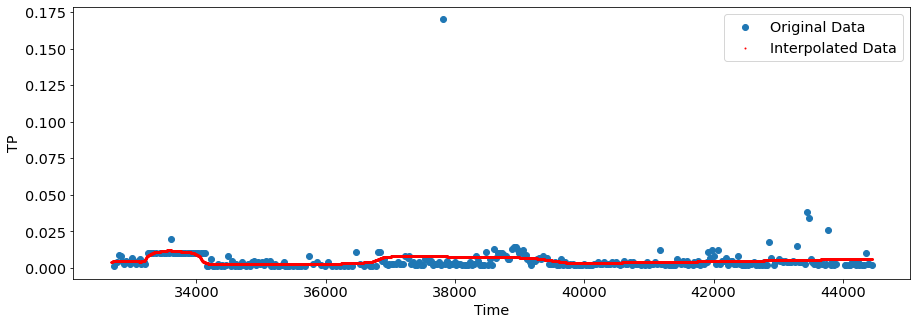

313/313 [==============================] - 0s 343us/step - loss: 1.3722e-18
['loss']


In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('C:/Users/yanzh/Interpolation//TP/saved_model/my_modelBB50_TP')
# Check its architecture
model.summary()

df = pd.read_csv("E:/1 My Project/Interpolated data/TP_data/BB50.csv")
time = df['time'].values
TP = df['TP'].values
df

#Transform the normalized scale to real scale
TP_min = 0.001
TP_max = 0.17
time_min = 32723.46                         
time_max = 44454.42                             

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(TP_max - TP_min) + TP_min

# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, TP*(TP_max - TP_min) + TP_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('TP')
plt.legend()
plt.show()

model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)

In [2]:
interpolation = model.predict([0.234042264
,0.239071688
,0.249471514
,0.254671427
,0.25987134
,0.265156498
,0.270185922
,0.275385835
,0.280585748
,0.285785661
,0.290985574
,0.296270732
,0.301300156
,0.306500069
,0.311699982
,0.316899895
,0.322099808
,0.327384966
,0.332499634
,0.342899461
,0.776111893
,0.955210539
,0.957767873
,0.960410452
])
interpolation

array([[0.00952594],
       [0.00953279],
       [0.00954694],
       [0.00955401],
       [0.00956115],
       [0.00956411],
       [0.00954571],
       [0.0096221 ],
       [0.00984589],
       [0.01028025],
       [0.01084707],
       [0.01149566],
       [0.01211287],
       [0.01275104],
       [0.01338951],
       [0.01402798],
       [0.01478201],
       [0.01565506],
       [0.01663317],
       [0.02208774],
       [0.02031821],
       [0.02923389],
       [0.02935872],
       [0.02948772]], dtype=float32)